In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

In [65]:
netflix_df=pd.read_csv("netflix_data.csv")
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


In [66]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   duration      7787 non-null   int64 
 9   description   7787 non-null   object
 10  genre         7787 non-null   object
dtypes: int64(2), object(9)
memory usage: 669.3+ KB


In [67]:
netflix_df.shape

(7787, 11)

In [68]:
netflix_df.describe()

,release_year,duration
count,7787.000000,7787.000000
mean,2013.932580,69.122769
std,8.757395,50.950743
min,1925.000000,1.000000
25%,2013.000000,2.000000
50%,2017.000000,88.000000
75%,2018.000000,106.000000
max,2021.000000,312.000000


### comencemos con el analisis

In [69]:
netflix_df["type"].value_counts()

type
Movie      5377
TV Show    2410
Name: count, dtype: int64

In [70]:
netflix_df_movie=netflix_df[netflix_df["type"]=="Movie"]
netflix_df_movie

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,95,"After an awful accident, a couple admitted to ...",Horror Movies
...,...,...,...,...,...,...,...,...,...,...,...
7781,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,88,"Dragged from civilian life, a former superhero...",Children
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",Sweden,"October 19, 2020",2005,99,When Lebanon's Civil War deprives Zozo of his ...,Dramas
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,111,A scrappy but poor boy worms his way into a ty...,Dramas
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,44,"In this documentary, South African rapper Nast...",Documentaries


In [71]:
netflix_df_movie_columns= netflix_df_movie[["title","country","genre","release_year","duration"]]
netflix_df_movie_columns.head()

,title,country,genre,release_year,duration
1,7:19,Mexico,Dramas,2016,93
2,23:59,Singapore,Horror Movies,2011,78
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123
6,122,Egypt,Horror Movies,2019,95


## Crear una grafico de puntos

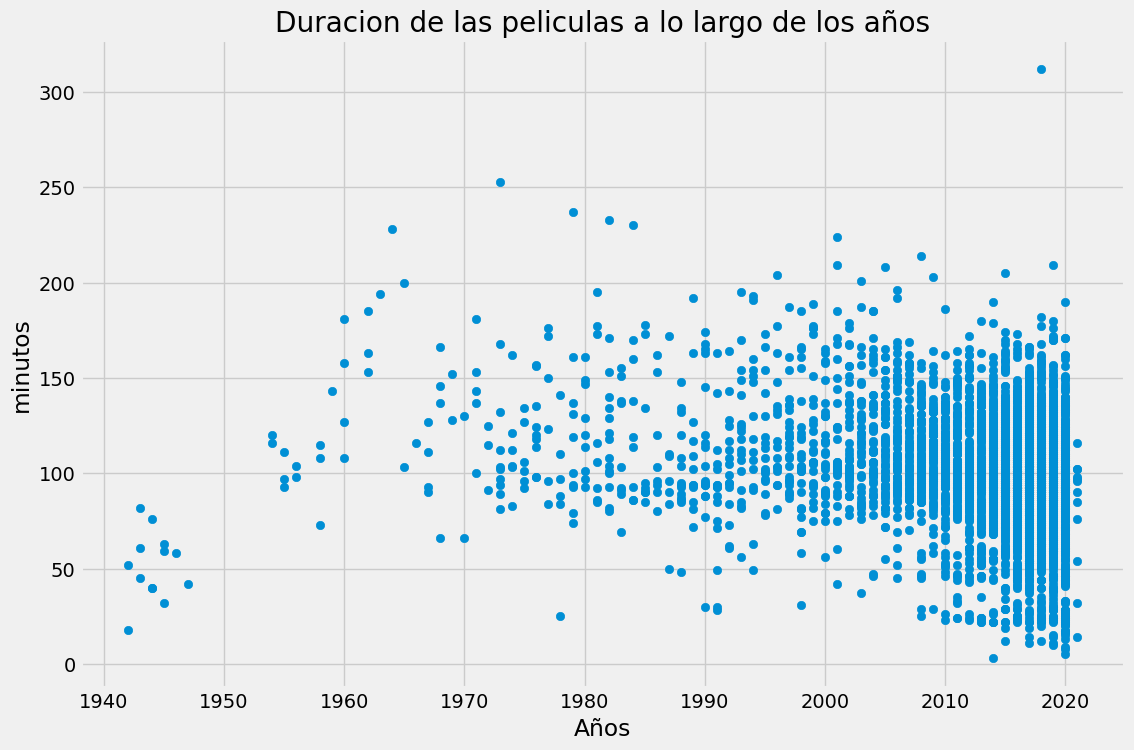

In [72]:
fig=plt.figure(figsize=(12,8))
plt.scatter("release_year","duration",data=netflix_df_movie_columns)
plt.xlabel("Años")
plt.ylabel("minutos")
plt.title("Duracion de las peliculas a lo largo de los años")

plt.show()

In [73]:
#averiguar cual es la pelicula con menos duracion
netflix_df_movie_columns.nsmallest(n=1, columns="duration")

,title,country,genre,release_year,duration
5605,Silent,United States,Children,2014,3


In [74]:
#averiguar cual es la pelicula con mas duracion
netflix_df_movie_columns.nlargest(n=1, columns="duration")

,title,country,genre,release_year,duration
957,Black Mirror: Bandersnatch,United States,Dramas,2018,312


In [75]:
netflix_df_movie_columns["genre"].value_counts()

genre
Dramas                  1384
Comedies                1074
Documentaries            751
Action                   721
Children                 502
Stand-Up                 321
Horror Movies            244
International Movies     114
Classic Movies            77
Uncategorized             56
Thrillers                 49
Independent Movies        20
Anime Features            19
Music                     17
Cult Movies               12
Sci-Fi                    11
Romantic Movies            3
Sports Movies              1
LGBTQ Movies               1
Name: count, dtype: int64

In [76]:
netflix_df_movie_filtred=netflix_df_movie_columns[
    (netflix_df_movie_columns["genre"]== "Dramas")|
    (netflix_df_movie_columns["genre"]== "Comedies")|
    (netflix_df_movie_columns["genre"]== "Documentaries")
]
netflix_df_movie_filtred

,title,country,genre,release_year,duration
1,7:19,Mexico,Dramas,2016,93
4,21,United States,Dramas,2008,123
7,187,United States,Dramas,1997,119
10,1922,United States,Dramas,2017,103
13,"2,215",Thailand,Documentaries,2018,89
...,...,...,...,...,...
7780,Zoo,India,Dramas,2018,94
7782,Zozo,Sweden,Dramas,2005,99
7783,Zubaan,India,Dramas,2015,111
7784,Zulu Man in Japan,NaN,Documentaries,2019,44


In [77]:
color_map={
    "Dramas":"red",
    "Documentaries":"blue"
}

colores3=netflix_df_movie_filtred["genre"].map(lambda col:color_map.get(col,"black")).to_list()

print(colores3[:10])

['red', 'red', 'red', 'red', 'blue', 'red', 'red', 'black', 'red', 'red']


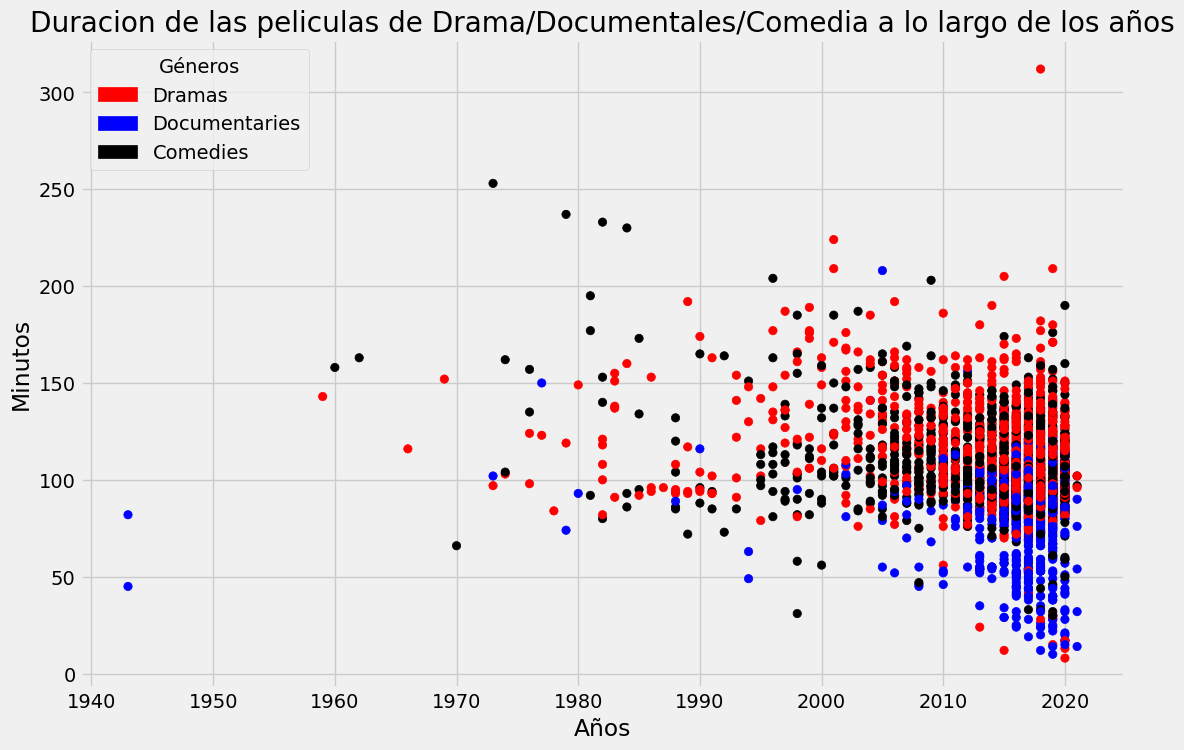

In [78]:
fig=plt.figure(figsize=(12,8))
plt.style.use("fivethirtyeight")
plt.scatter("release_year","duration", data=netflix_df_movie_filtred, color=colores3)
legend_elements = [
    mpatches.Patch(color='red', label='Dramas'),
    mpatches.Patch(color='blue', label='Documentaries'),
    mpatches.Patch(color='black', label='Comedies')
]
plt.legend(handles=legend_elements, title='Géneros')

plt.xlabel("Años")
plt.ylabel("Minutos")
plt.title("Duracion de las peliculas de Drama/Documentales/Comedia a lo largo de los años")
plt.show()

In [79]:
count_movies=netflix_df_movie_columns["genre"].value_counts()

In [80]:
count_movies.index

Index(['Dramas', 'Comedies', 'Documentaries', 'Action', 'Children', 'Stand-Up',
       'Horror Movies', 'International Movies', 'Classic Movies',
       'Uncategorized', 'Thrillers', 'Independent Movies', 'Anime Features',
       'Music', 'Cult Movies', 'Sci-Fi', 'Romantic Movies', 'Sports Movies',
       'LGBTQ Movies'],
      dtype='object', name='genre')

In [81]:
count_movies.values

array([1384, 1074,  751,  721,  502,  321,  244,  114,   77,   56,   49,
         20,   19,   17,   12,   11,    3,    1,    1])

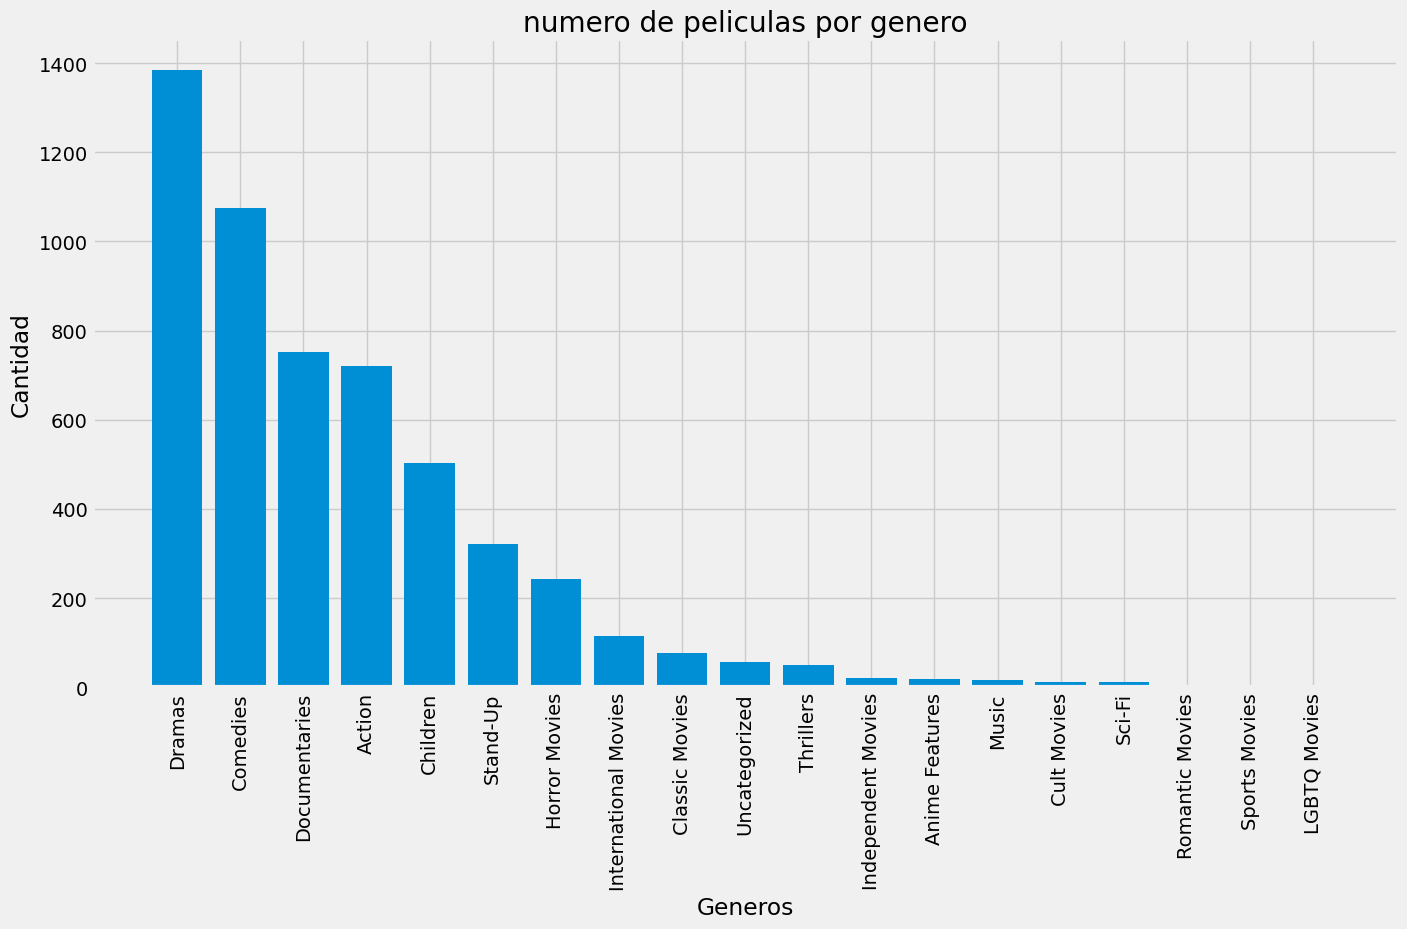

In [82]:
fig=plt.figure(figsize=(15,8))
plt.style.use("fivethirtyeight")

plt.bar(count_movies.index, count_movies.values, data=count_movies)
plt.xlabel("Generos")
plt.ylabel("Cantidad")
plt.title("numero de peliculas por genero")
plt.xticks(rotation=90)
plt.show()

In [83]:
movies_duration_year=netflix_df_movie_columns.groupby("release_year")["duration"].mean().reset_index()
movies_duration_year

,release_year,duration
0,1942,35.000000
1,1943,62.666667
2,1944,52.000000
3,1945,51.333333
4,1946,58.000000
...,...,...
67,2017,94.836022
68,2018,96.170300
69,2019,93.457045
70,2020,89.795620


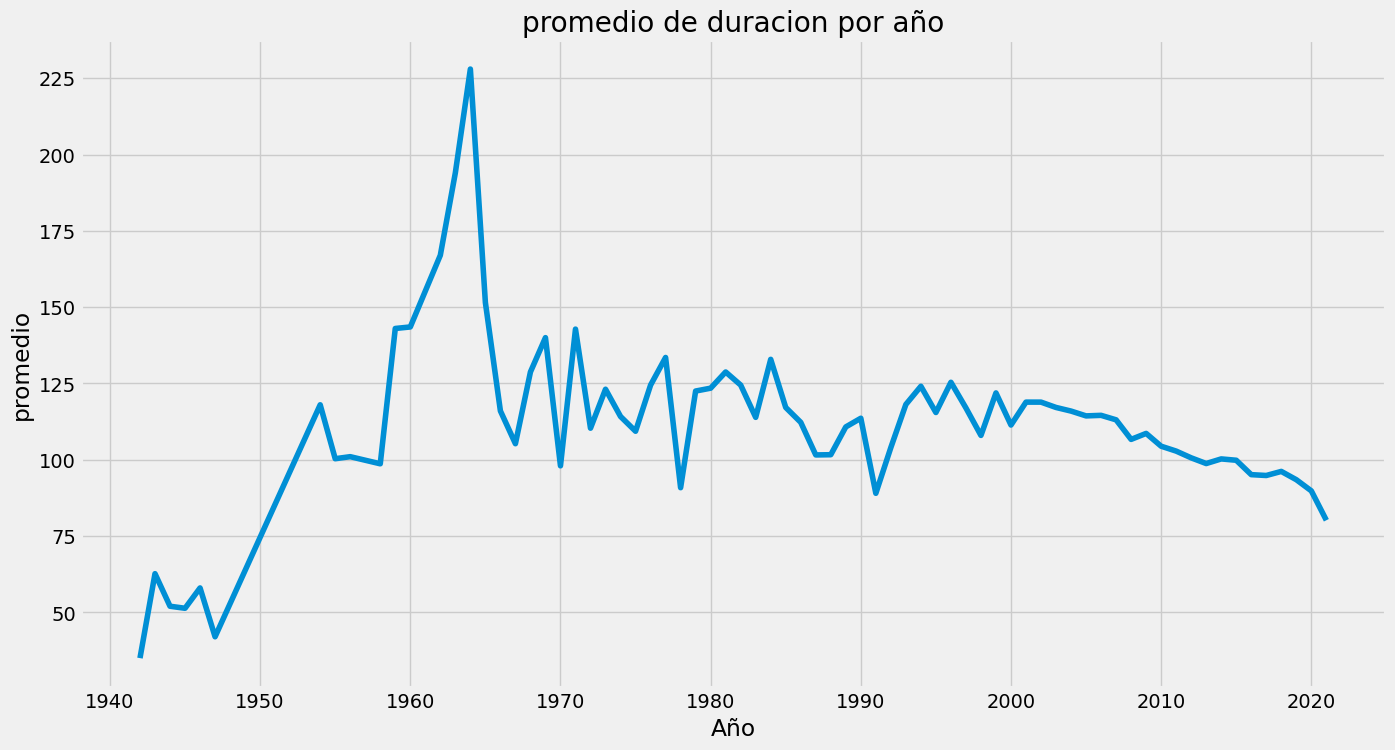

In [84]:
fig=plt.figure(figsize=(15,8))
plt.style.use("fivethirtyeight")

plt.plot("release_year","duration",data=movies_duration_year)
plt.xlabel("Año")
plt.ylabel("promedio")
plt.title("promedio de duracion por año")
plt.show()


In [118]:
df_año=netflix_df_movie_filtred["release_year"].value_counts()
df_año.reset_index().sort_values(by="release_year").head(10)

,release_year,count
43,1943,2
54,1959,1
49,1960,1
50,1962,1
47,1966,1
48,1969,1
52,1970,1
40,1973,3
42,1974,3
35,1976,4


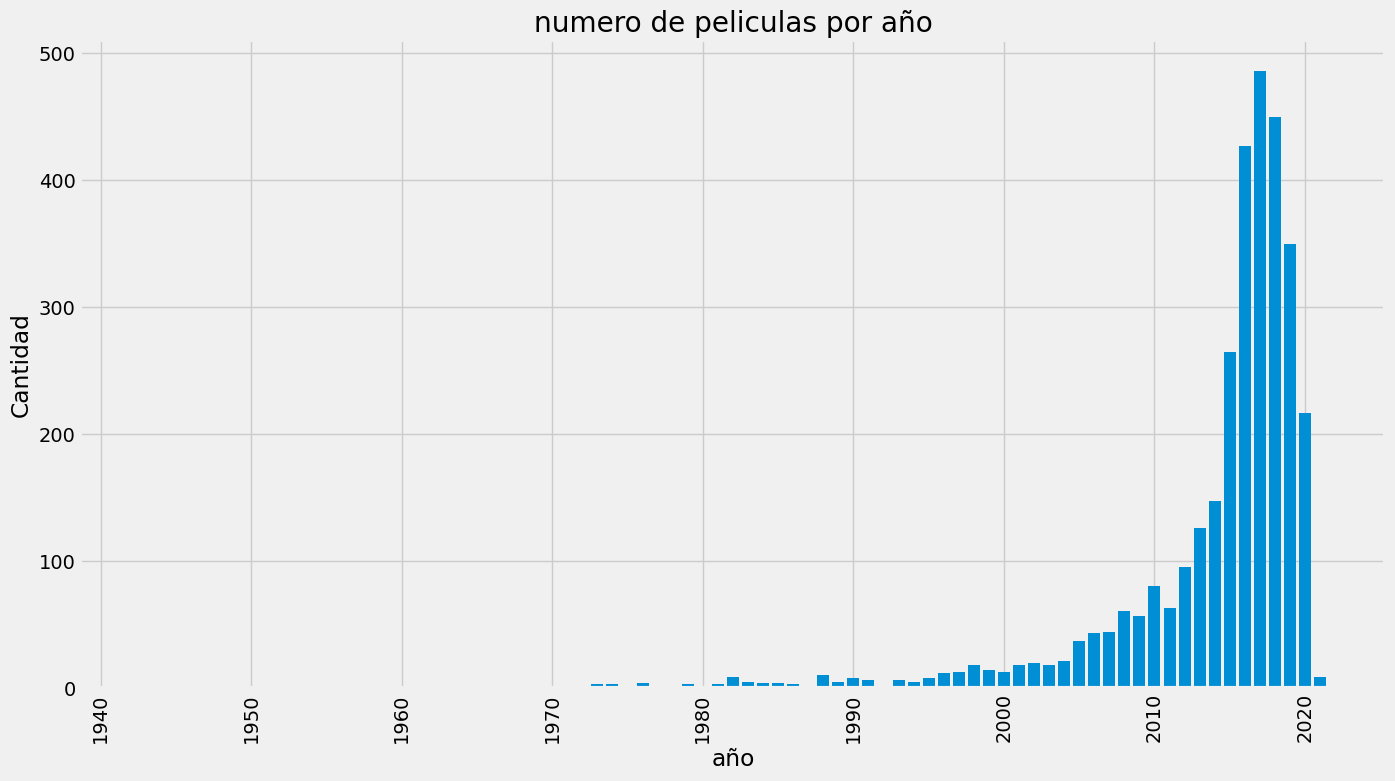

In [86]:
fig=plt.figure(figsize=(15,8))
plt.style.use("fivethirtyeight")

plt.bar(df_año.index, df_año.values, data=df_año)
plt.xlabel("año")
plt.ylabel("Cantidad")
plt.title("numero de peliculas por año")
plt.xticks(rotation=90)
plt.show()

In [105]:
cantidadA = netflix_df_movie_columns[netflix_df_movie_columns["release_year"] <= 2000].shape[0]

print(f"Cantidad de películas entre 1943 y 2000: {cantidadA}")

Cantidad de películas entre 1943 y 2000: 432


In [108]:
cantidadB = netflix_df_movie_columns[(netflix_df_movie_columns["release_year"] >= 2000)].shape[0]

print(f"Cantidad de películas desde 2000 en adelante: {cantidadB}")

Cantidad de películas desde 2000 en adelante: 4975


### Podemos ver que la razon por la cual el promedio de duracion de las peliculas va desminuyendo, es porque el numero de peliculas por año aumento considerablemente

In [112]:
df_country=netflix_df_movie_columns["country"].value_counts().head(10)
df_country

country
United States     2100
India              883
United Kingdom     341
Canada             175
France             137
Spain              119
Egypt               93
Mexico              79
Turkey              78
Japan               75
Name: count, dtype: int64

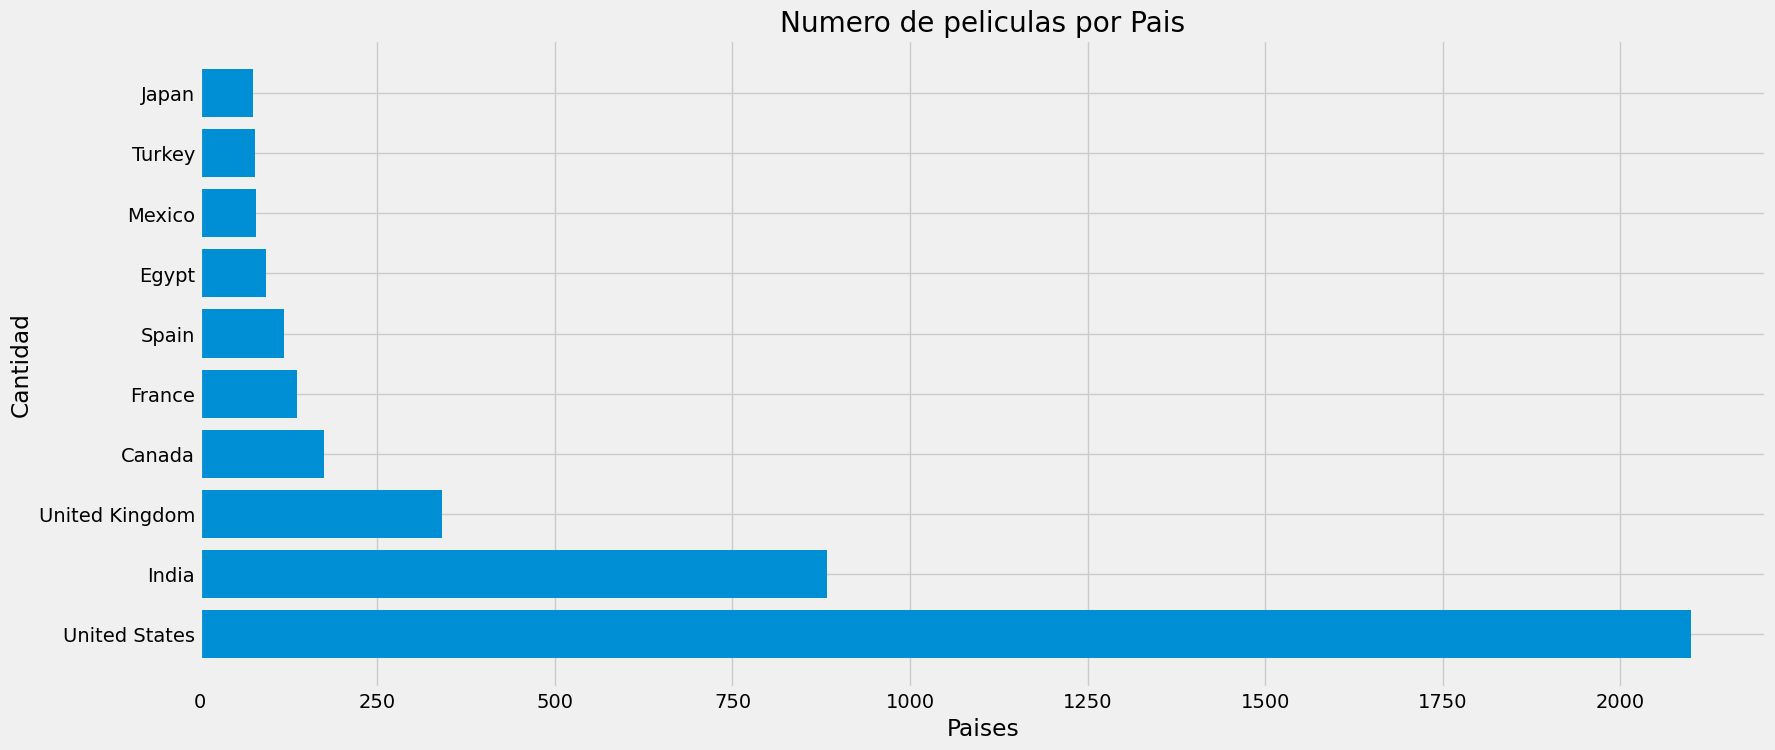

In [117]:
fig=plt.figure(figsize=(18,8))
plt.style.use("fivethirtyeight")

plt.barh(df_country.index, df_country.values, data=df_country)
plt.xlabel("Paises")
plt.ylabel("Cantidad")
plt.title("Numero de peliculas por Pais")
plt.show()